### Libraries

In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor, NearestNeighbors
from sklearn.decomposition import PCA
from sklearn import cluster, manifold
from sklearn.cluster import cluster_optics_dbscan
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from umap.umap_ import UMAP
from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm
import seaborn as sns


### Data Preprocessing

In [542]:
data = pd.read_csv('../data/water_potability.csv')
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

#### NULLS

In [543]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [544]:
data[data.isnull().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [545]:
data_cleaned = data.dropna()
#data_cleaned = data.fillna(data.mean())
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [546]:
data_cleaned.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [547]:
data_cleaned.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


### Features

In [548]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [549]:
columnas_numericas = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']
scaler = MinMaxScaler()
data_cleaned[columnas_numericas] = scaler.fit_transform(data_cleaned[columnas_numericas])

C:\Users\Dodo\AppData\Local\Temp\ipykernel_15760\2245448230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[columnas_numericas] = scaler.fit_transform(data_cleaned[columnas_numericas])


In [550]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0.0
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0.0
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0.0
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0.0
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0.0
...,...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156,1.0
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061,1.0
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674,1.0
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004,1.0


In [551]:
weights = {
    'Trihalomethanes': 0.05, 
    'Sulfate': 0.05, 
    'Chloramines': 0.1, 
    'Conductivity': 0.1, 
    'Organic_carbon': 0.1, 
    'Turbidity': 0.15,
    'ph':0.15,
    'Hardness': 0.15,
    'Solids': 0.15
}

In [552]:
weights_test = {
    'Trihalomethanes': 0.11, 
    'Sulfate': 0.11, 
    'Chloramines': 0.11, 
    'Conductivity': 0.11, 
    'Organic_carbon': 0.11, 
    'Turbidity': 0.11,
    'ph':0.12,
    'Hardness': 0.11,
    'Solids': 0.11
}

In [553]:
data_cleaned['contaminationLevel'] = data_cleaned.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)

C:\Users\Dodo\AppData\Local\Temp\ipykernel_15760\231736569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contaminationLevel'] = data_cleaned.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)


In [554]:
data_cleaned

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,contaminationLevel
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115,0.0,0.550916
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358,0.0,0.441151
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973,0.0,0.377757
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428,0.0,0.512831
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049,0.0,0.460604
...,...,...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156,1.0,0.471571
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061,1.0,0.424499
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674,1.0,0.520381
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004,1.0,0.454205


In [555]:
# Python
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the 'score' column and transform it
data_cleaned['contaminationLevel'] = scaler.fit_transform(data_cleaned[['contaminationLevel']])

# Round the scores to the nearest 0.1
data_cleaned['contaminationLevel'] = data_cleaned['contaminationLevel'].round(1)

C:\Users\Dodo\AppData\Local\Temp\ipykernel_15760\4222132356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contaminationLevel'] = scaler.fit_transform(data_cleaned[['contaminationLevel']])
C:\Users\Dodo\AppData\Local\Temp\ipykernel_15760\4222132356.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['contaminationLevel'] = data_cleaned['contaminationLevel'].round(1)


In [556]:
data_cleaned['contaminationLevel'].value_counts().sort_index()

contaminationLevel
0.0      3
0.1     10
0.2     75
0.3    256
0.4    487
0.5    553
0.6    400
0.7    182
0.8     30
0.9     13
1.0      2
Name: count, dtype: int64

In [557]:
y = data_cleaned[['contaminationLevel', 'Potability']]
X = data_cleaned.drop(columns=['contaminationLevel', 'Potability'])

In [558]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


### Outliers

In [559]:
pca = PCA(0.95)
data_pca = pca.fit_transform(X.values) 

In [560]:
# Get the loadings for each component
pca.components_[0]

array([-0.1511047 , -0.15093487,  0.82020372, -0.09329225, -0.19522689,
        0.01325345, -0.05144454, -0.07335747,  0.47605818])

The feature "ph" has a loading of approximately -0.1511.  
The feature "Hardness" has a loading of approximately -0.1509.  
The feature "Solids" has a loading of approximately 0.8202.  
The feature "Chloramines" has a loading of approximately -0.0933.  
The feature "Sulfate" has a loading of approximately -0.1952.  
The feature "Conductivity" has a loading of approximately 0.0133.  
The feature "Organic_carbon" has a loading of approximately -0.0514.  
The feature "Trihalomethanes" has a loading of approximately -0.0734.  
The feature "Turbidity" has a loading of approximately 0.4761.  

In this case, "Solids," "Turbidity," and "Conductivity" have relatively high absolute loadings, suggesting they are the most influential in the creation of the first principal component.  
On the other hand, "ph," "Hardness," "Chloramines," and other features have smaller absolute loadings.

In [561]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


In [562]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean')
lof.fit_predict(data_pca)
scores = lof.negative_outlier_factor_

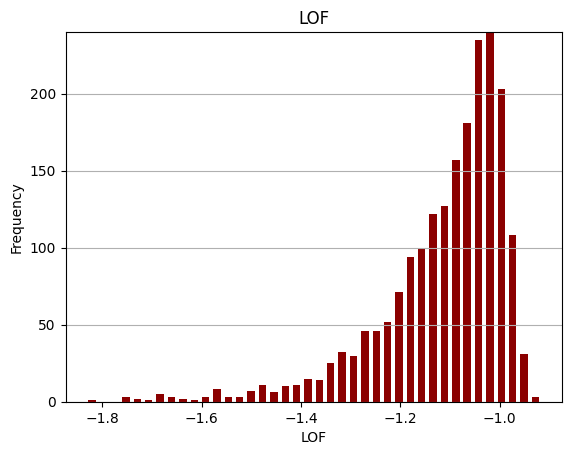

In [563]:
def plot_hist(X: pd.DataFrame, title: str) -> None:
    """ Funcion que genera un grafico de los valores de LOF del dataset """
    x, bins, patches = plt.hist(x=X, bins='auto', rwidth=0.65, color='darkred')
    plt.grid(axis='y')
    plt.xlabel('LOF')
    plt.ylabel('Frequency')
    plt.title(title)
    maxfreq = x.max()
    plt.ylim(ymax=np.ceil(maxfreq))
    
plot_hist(scores, 'LOF')



In [564]:
# Dado el grafico anterior, diremos que un umbral de corte sera aproximadamente -1.85
def lof_threshold(v: float, scores: np.ndarray) -> float:
    ''' Retorna la contaminacion del medio '''
    N = len(scores)
    points = scores[scores < v]
    threshold = len(points)/N
    return threshold 

lof_threshold(-1.7, scores) # Contaminacion del medio



0.0034808552958727

In [565]:
lof = LocalOutlierFactor(n_neighbors=5, metric='euclidean', contamination=0.0034808552958727)
labels = lof.fit_predict(X.values)

# Obtenemos los indices de los datos que son inliners
indices = list(np.where(labels==1)[0])

# Eliminamos los outliers del dataset 'data', filtrando el dataset solo con los datos
# que no son inliners (label = 1)
X = X.iloc[indices]


In [566]:
y = y.iloc[indices]

In [567]:
print(X.shape, y.shape)

(2004, 9) (2004, 2)


### Classes

In [568]:
y['Potability'].value_counts() # Balanceo de clases

Potability
0.0    1198
1.0     806
Name: count, dtype: int64

In [569]:
y['contaminationLevel'].value_counts().sort_index()

contaminationLevel
0.0      3
0.1     10
0.2     74
0.3    255
0.4    486
0.5    553
0.6    397
0.7    181
0.8     30
0.9     13
1.0      2
Name: count, dtype: int64

### Clustering
#### Normalization


In [570]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,0.587349,0.577747,0.386298,0.568199,0.647347,0.292985,0.654522,0.795029,0.630115
4,0.643654,0.441300,0.314381,0.439304,0.514545,0.356685,0.377248,0.202914,0.520358
5,0.388934,0.470876,0.506122,0.524364,0.561537,0.142913,0.249922,0.401487,0.219973
6,0.725820,0.715942,0.506141,0.521683,0.751819,0.148683,0.467200,0.658678,0.242428
7,0.610517,0.532588,0.237701,0.270288,0.495155,0.494792,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...
3267,0.636224,0.580511,0.277748,0.418063,0.522486,0.342184,0.310364,0.402799,0.627156
3268,0.470143,0.548826,0.301347,0.538273,0.498565,0.231359,0.565061,0.175889,0.395061
3269,0.817826,0.087434,0.656389,0.670774,0.369089,0.431872,0.563265,0.285745,0.578674
3270,0.424187,0.464092,0.459656,0.541633,0.615572,0.388360,0.397780,0.449156,0.440004


In [571]:
Y = y['contaminationLevel']

In [572]:
Y

3       0.7
4       0.4
5       0.2
6       0.6
7       0.4
       ... 
3267    0.5
3268    0.3
3269    0.6
3270    0.4
3271    0.7
Name: contaminationLevel, Length: 2004, dtype: float64

In [573]:
tsne_embed = manifold.TSNE(n_components=2, perplexity = 50, n_iter=5000, n_iter_without_progress=150, n_jobs=10) 
projection_tsne = tsne_embed.fit_transform(X, Y)


In [574]:
umap_2d = UMAP(n_components = 2, min_dist = 1, n_neighbors= 50, n_jobs=8)
projection_umap = umap_2d.fit_transform(X, Y)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x800 with 0 Axes>

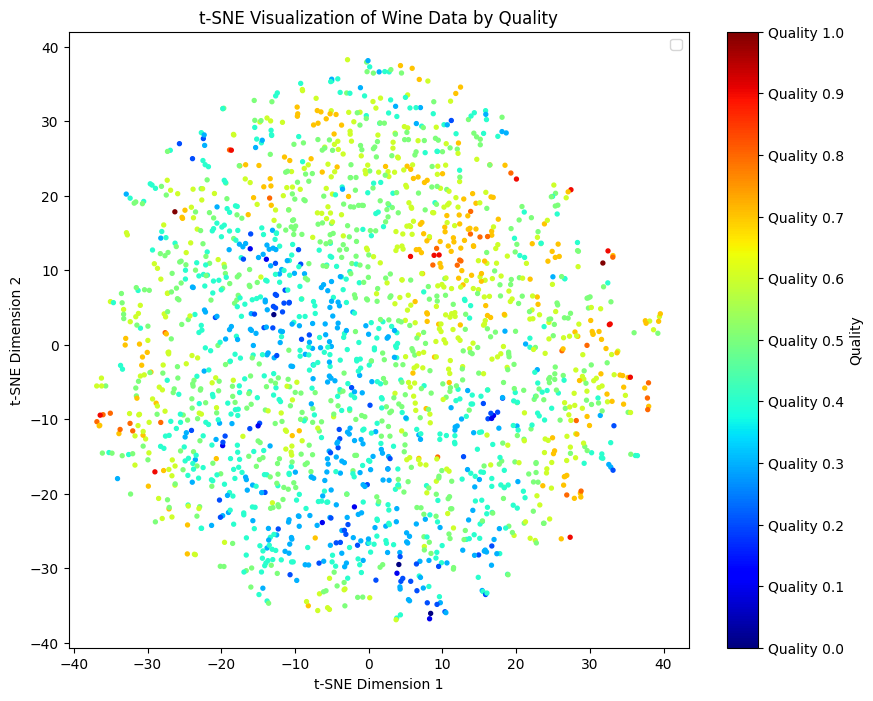

In [575]:
plt.figure(figsize=(10, 8))
cmap = plt.get_cmap('jet')

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    projection_tsne[:, 0], 
    projection_tsne[:, 1], 
    c=Y,  # Use quality as color values
    cmap=cmap,  # Use the jet color map
    s=8
)

cbar = plt.colorbar(scatter)
cbar.set_label('Quality')
cbar.set_ticks(np.unique(Y))
cbar.set_ticklabels([f'Quality {q}' for q in np.unique(y)])

# Add labels and legend
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Wine Data by Quality')
plt.legend()

# Show the plot
plt.show()

In [576]:
def plot_embedding(X,title):
    _, ax = plt.subplots(figsize=(8, 8))

    for digit in np.unique(Y):
        ax.scatter(
            *X[Y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.3,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-8:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
    ax.set_title(title)
    ax.axis("off")

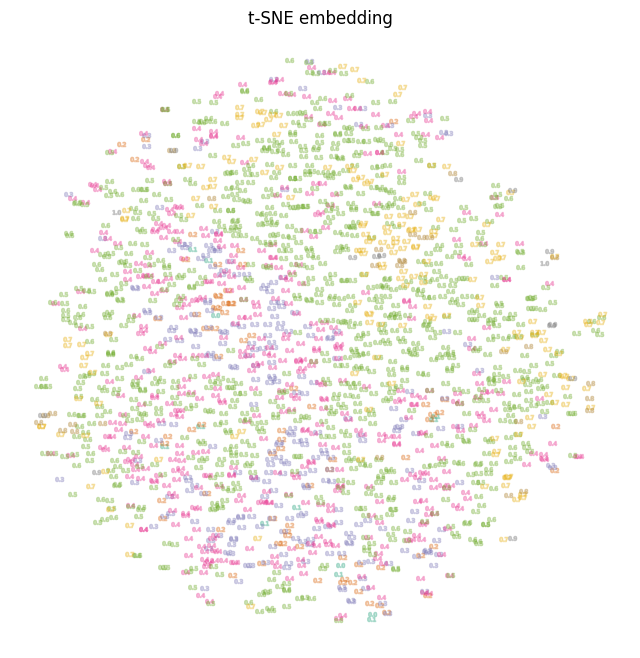

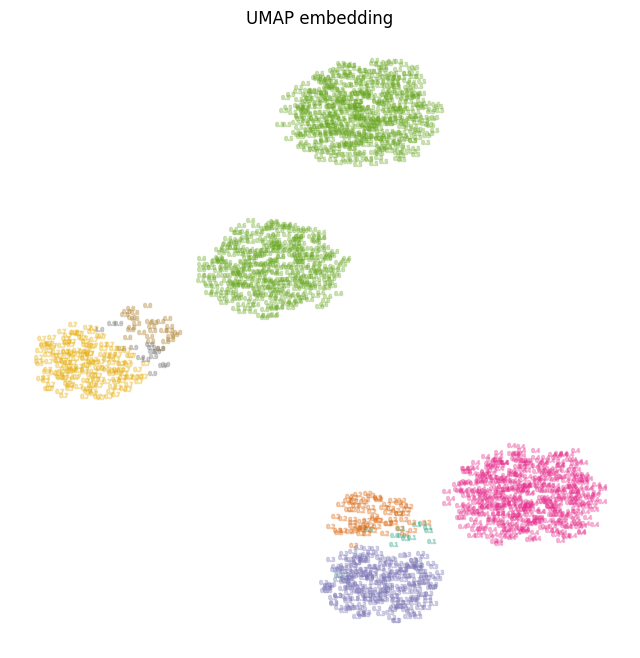

In [577]:
plot_embedding(projection_tsne, "t-SNE embedding")
plot_embedding(projection_umap, "UMAP embedding")

In [578]:
range_n_clusters = [2,3,4,5,6,7,8,9]
# Esta funcion nos permitira graficar los silhoutte scores que toma cada dato segun al cluster que pertencen, segun 
# el valor de k que se escoja.
def function_k_means(X):
    for n_clusters in range_n_clusters:
        
        fig, ax = plt.subplots(figsize=(6, 12))
        

        ax.set_xlim([-0.1, 1.0])
        ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        
        kmeans = KMeans(init="k-means++", n_clusters=n_clusters, n_init=4) # Utilizamos el algoritmo kmeans+ para escoger los centroides iniciales
        estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)

        cluster_labels = estimator.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "Para k= ",
            n_clusters,
            "Silhouette score promedio: ",
            silhouette_avg,
        )

        
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10 

        ax.set_title("Silhouette plot")
        ax.set_xlabel("Silhouette scores")
        ax.set_ylabel("Cluster ID")
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([]) 
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])


        plt.suptitle(
            "Análisis Silhouette para k = %d"
            % n_clusters,
            fontsize=16,
            fontweight="bold",
        )

    plt.show()

Para k=  2 Silhouette score promedio:  0.34413254
Para k=  3 Silhouette score promedio:  0.38402882
Para k=  4 Silhouette score promedio:  0.36514014
Para k=  5 Silhouette score promedio:  0.34670028
Para k=  6 Silhouette score promedio:  0.37293467
Para k=  7 Silhouette score promedio:  0.36313367
Para k=  8 Silhouette score promedio:  0.35811678
Para k=  9 Silhouette score promedio:  0.34017733


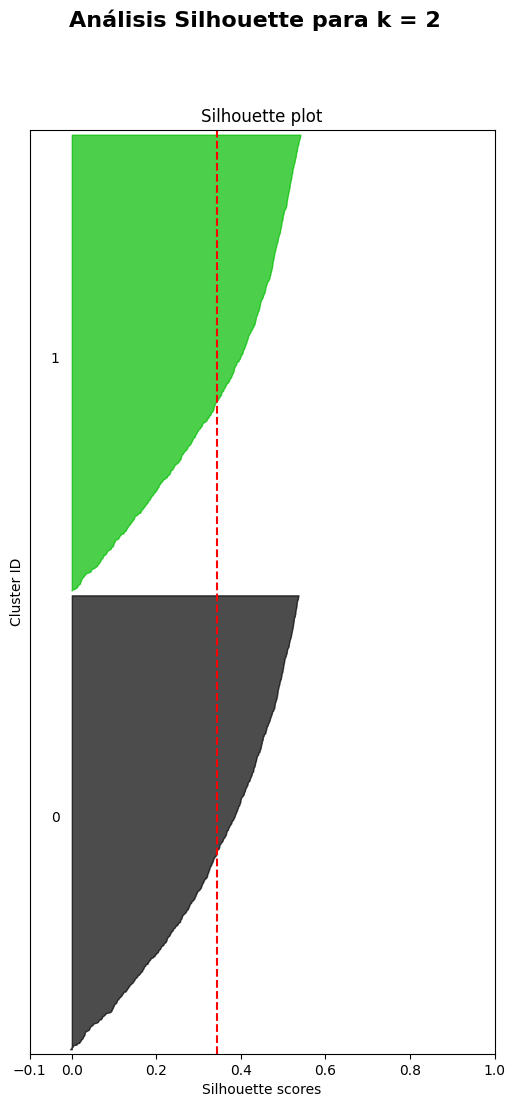

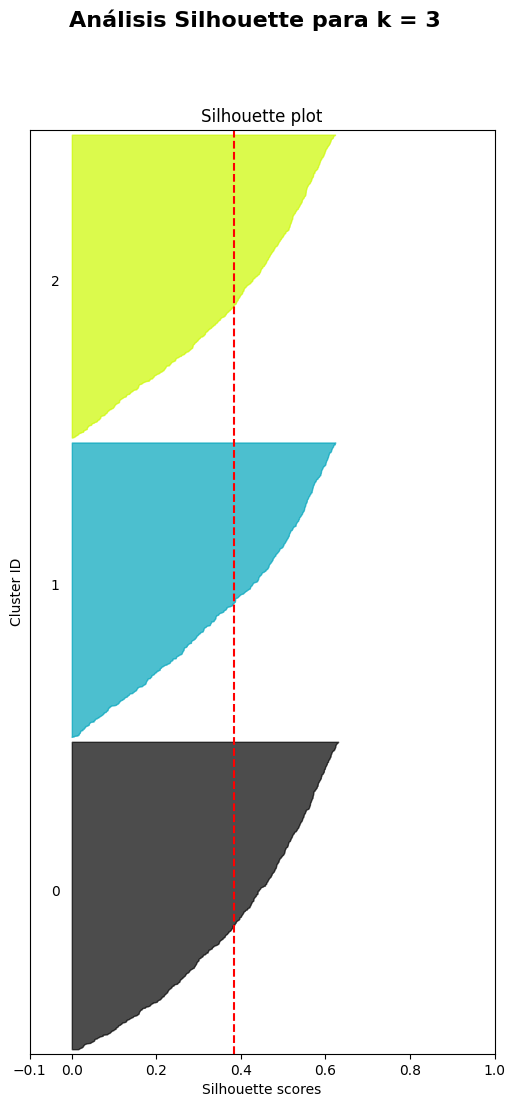

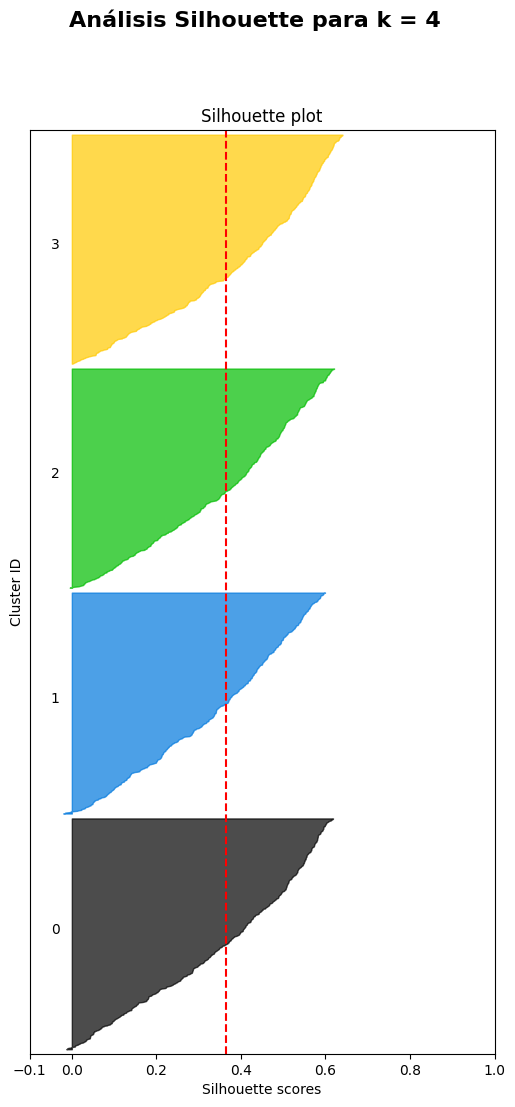

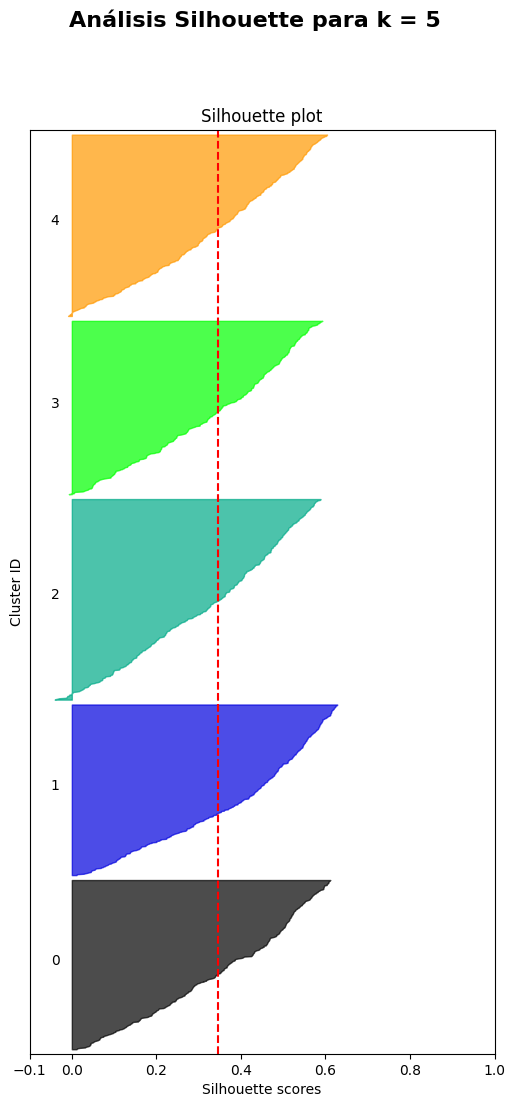

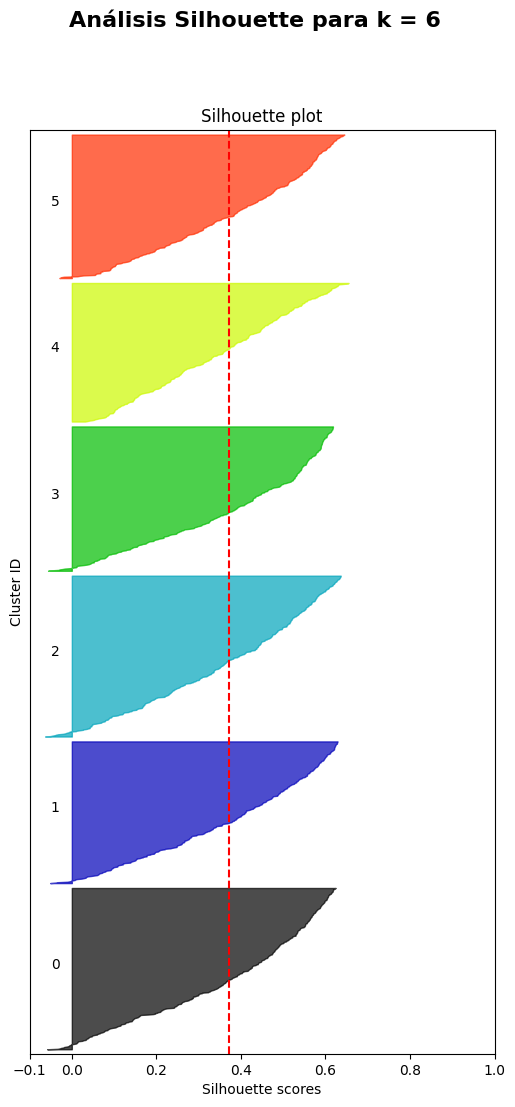

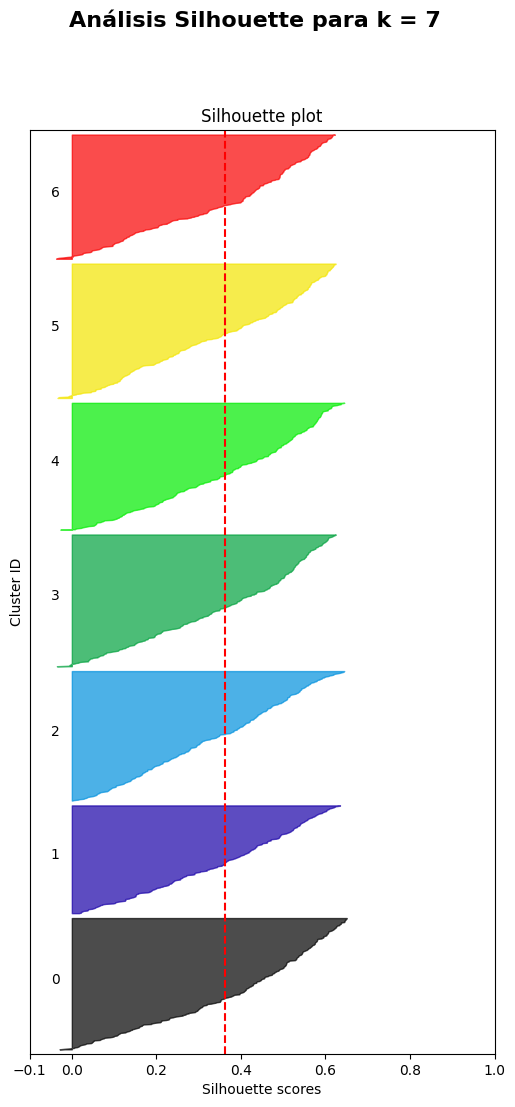

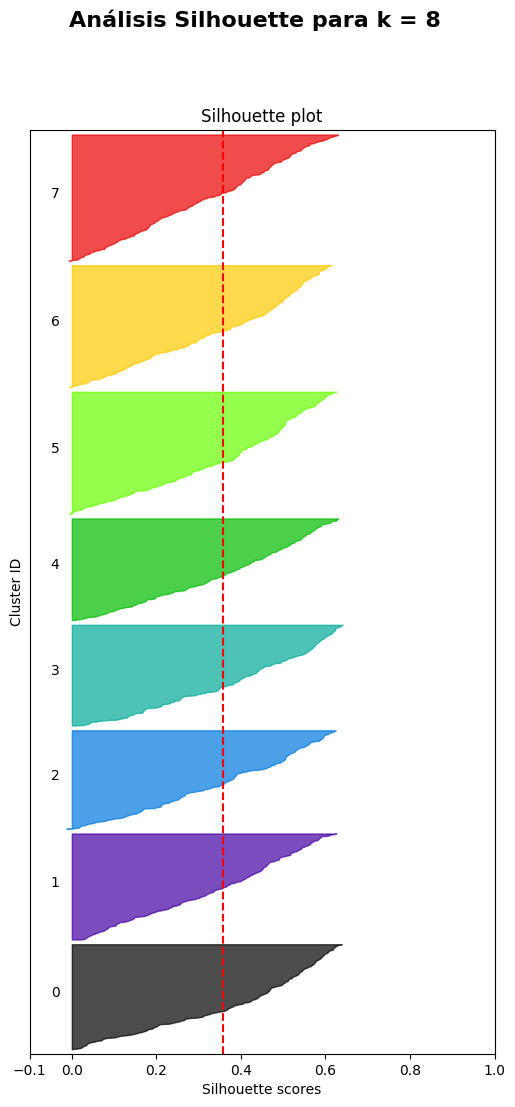

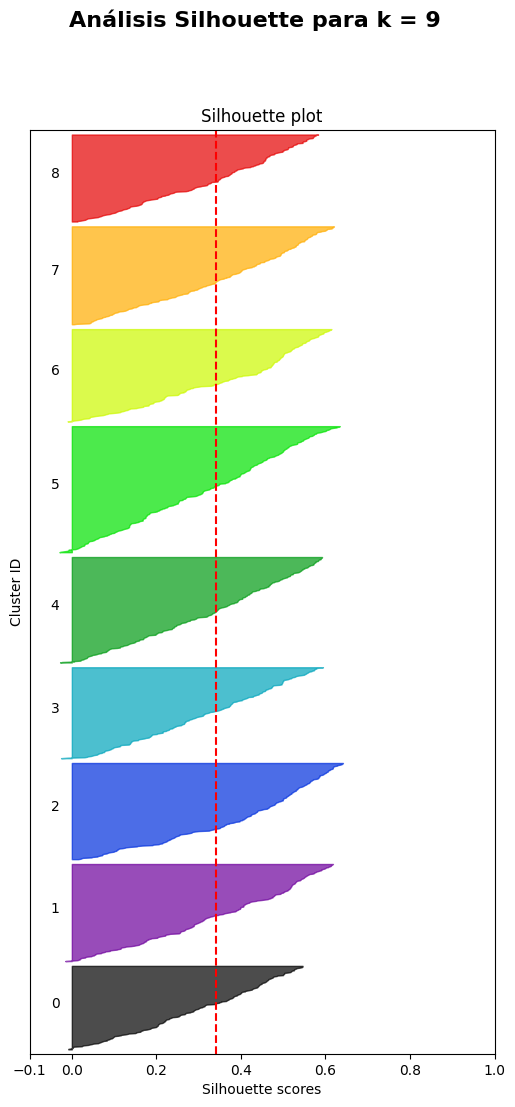

In [579]:
function_k_means(projection_tsne)

Para k=  4 Silhouette score promedio:  0.3785158


Para k=  2 Silhouette score promedio:  0.6588913
Para k=  3 Silhouette score promedio:  0.6905442
Para k=  4 Silhouette score promedio:  0.7153067
Para k=  5 Silhouette score promedio:  0.68487644
Para k=  6 Silhouette score promedio:  0.56651455
Para k=  7 Silhouette score promedio:  0.48287007
Para k=  8 Silhouette score promedio:  0.40534556
Para k=  9 Silhouette score promedio:  0.39872855


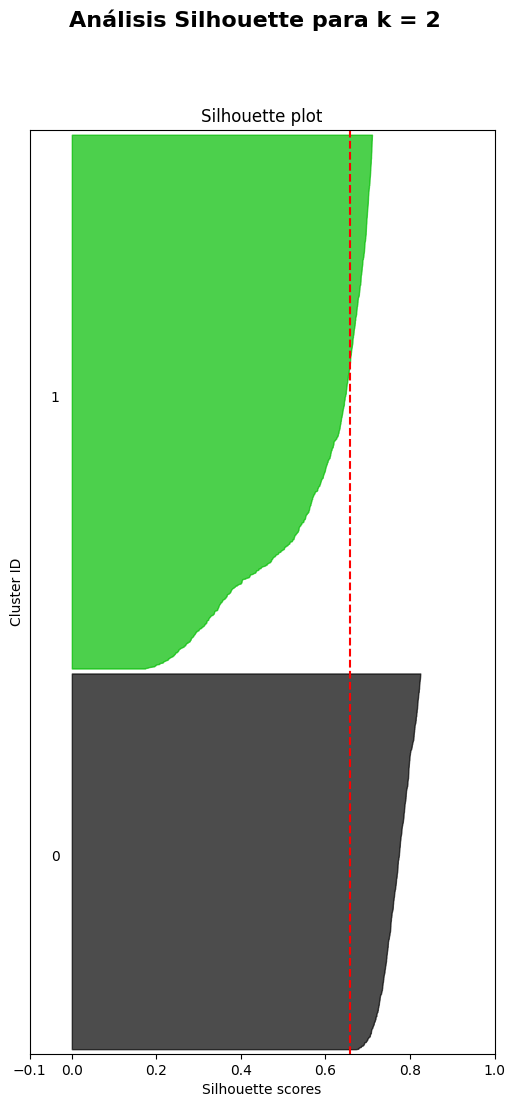

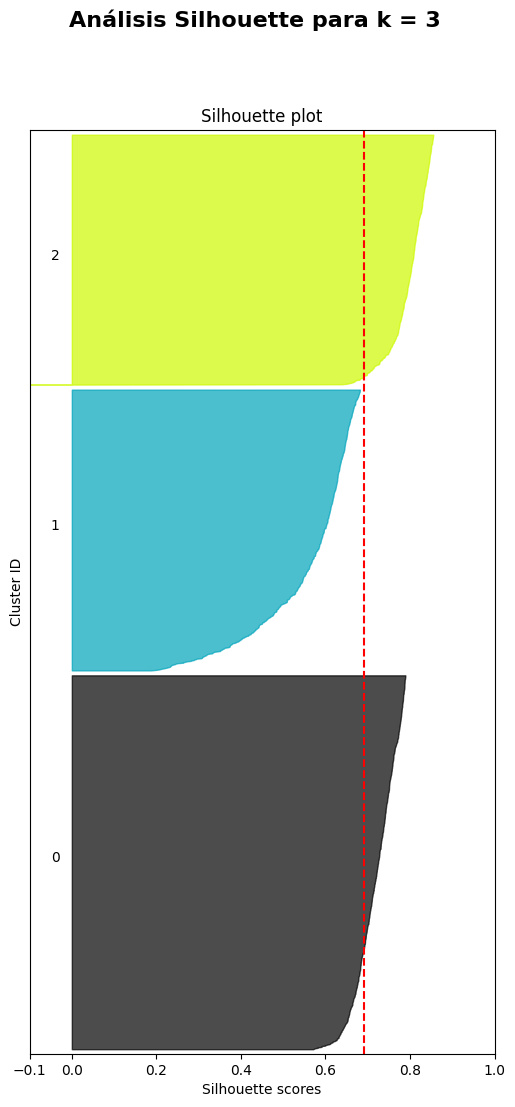

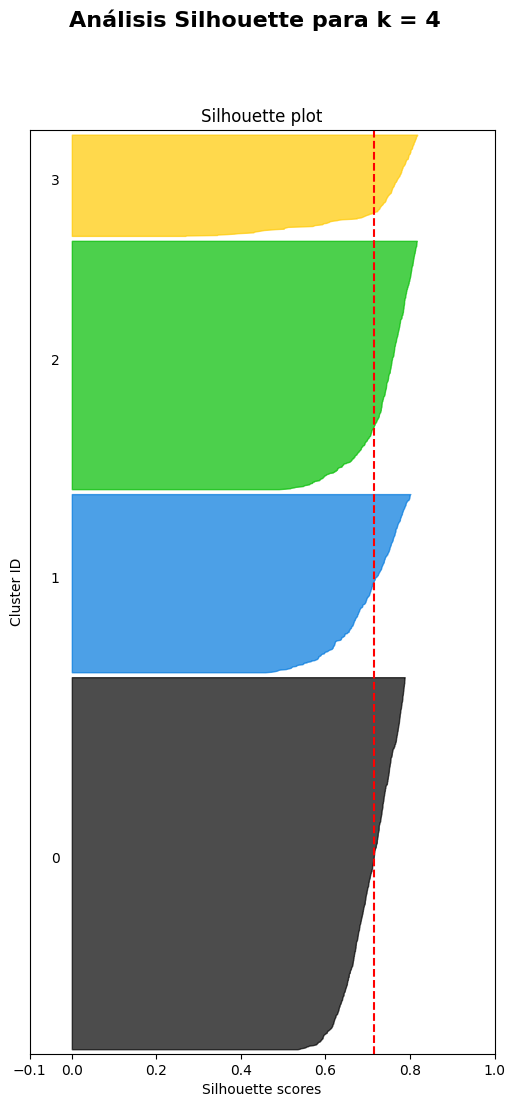

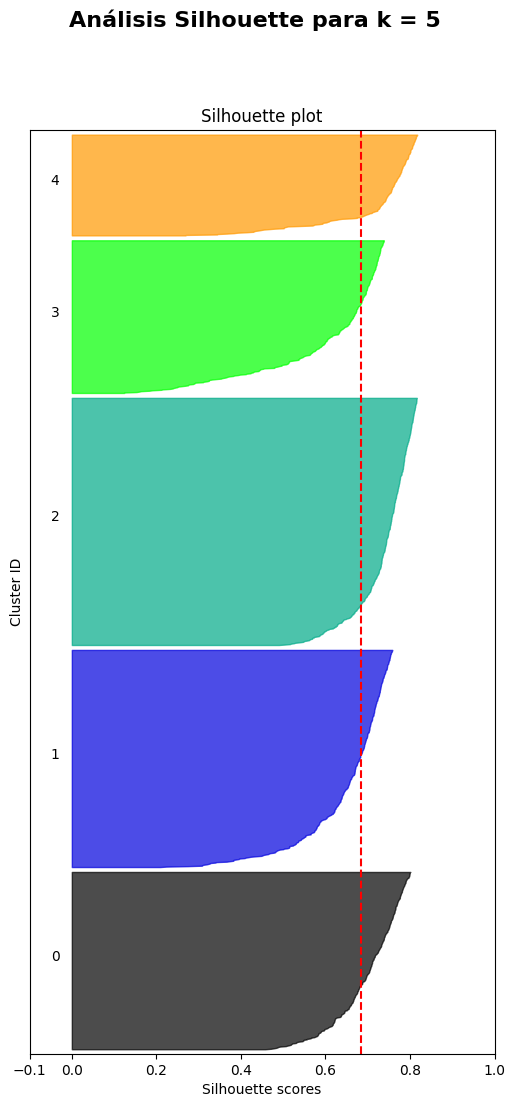

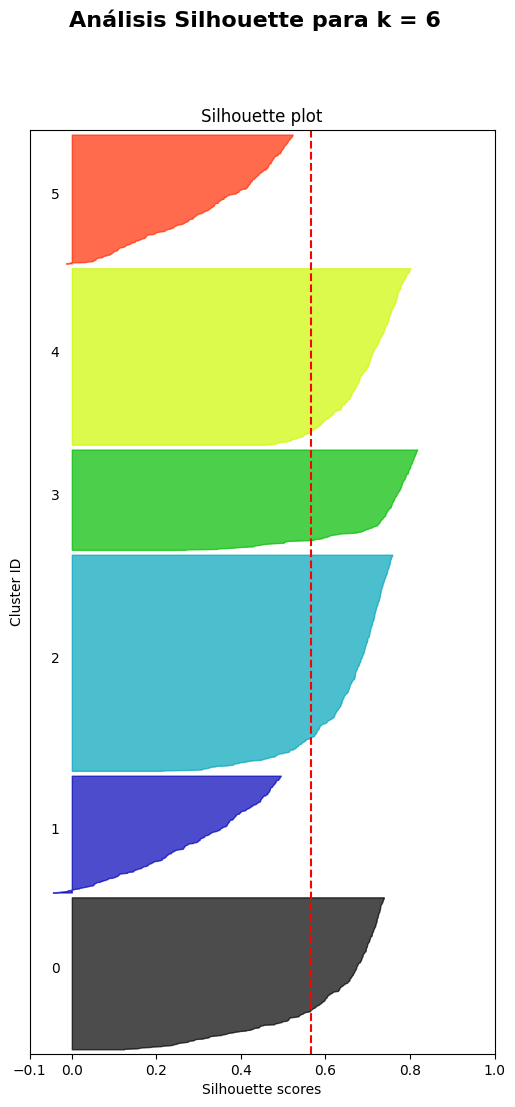

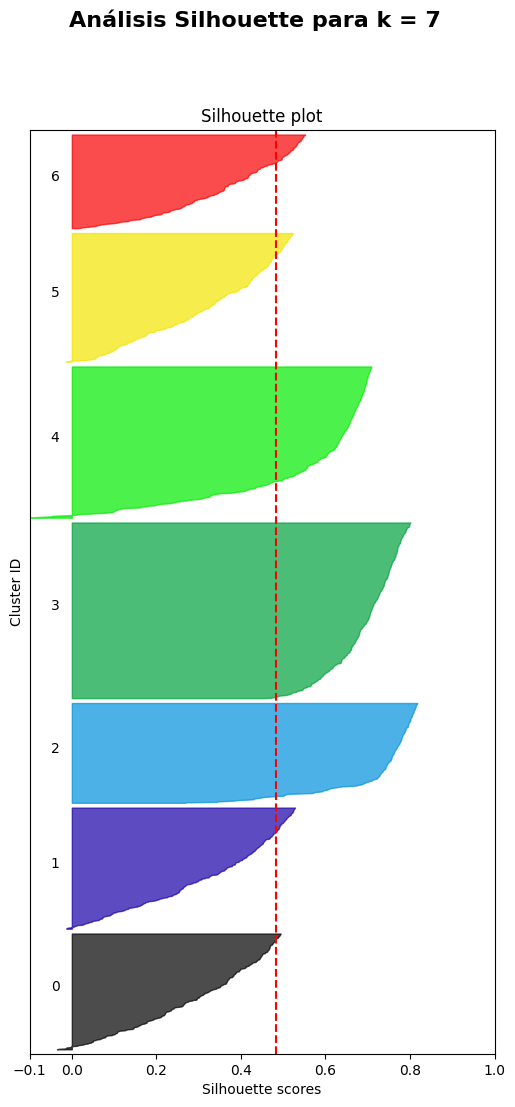

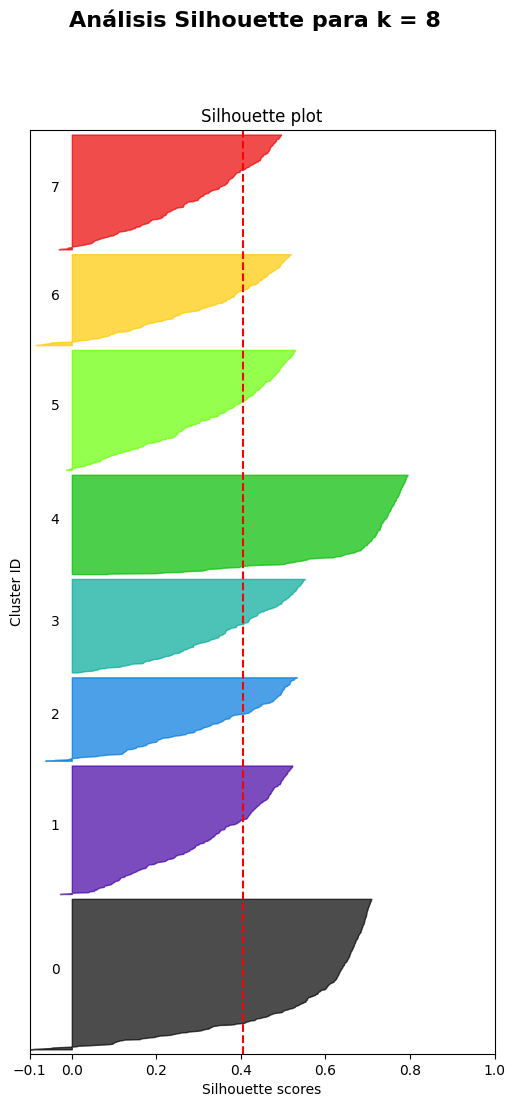

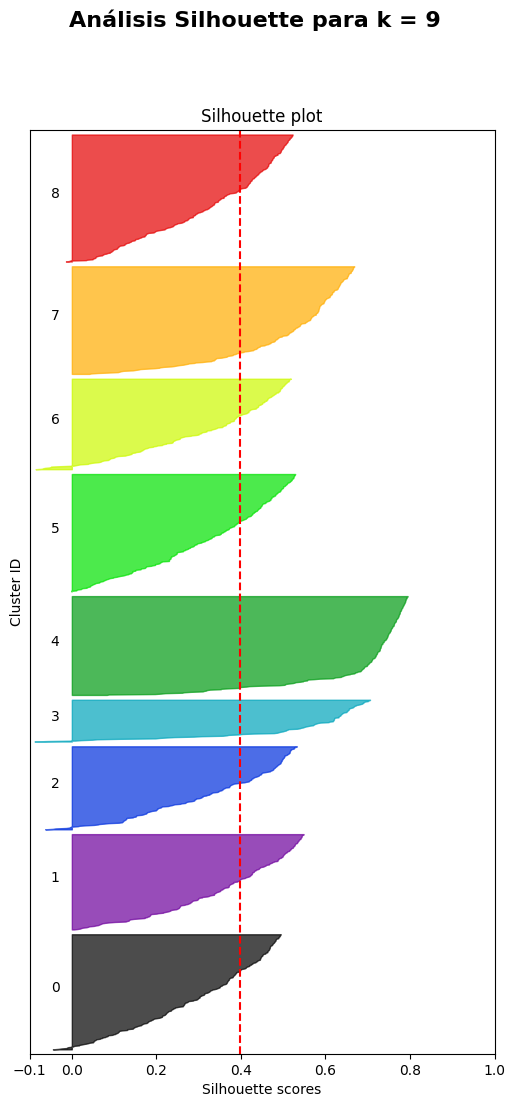

In [580]:
function_k_means(projection_umap)

Para k=  5 Silhouette score promedio:  0.6310486


In [581]:

colors = sns.color_palette("hls", 5)
def plot_clusters(X, k, title):
    # Perform clustering
    kmeans = KMeans(n_clusters=k)
    cluster = kmeans.fit_predict(X)

    # Plot the clusters
    plt.figure(figsize=(12, 5))
    for i in range(k):
        subset = X[cluster == i]
        plt.scatter(subset[:, 0], subset[:, 1], c=[colors[i]], label=f'Cluster {i}', s=8)
       
    plt.title(title)
    plt.legend()
    plt.show()

c:\Users\Dodo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


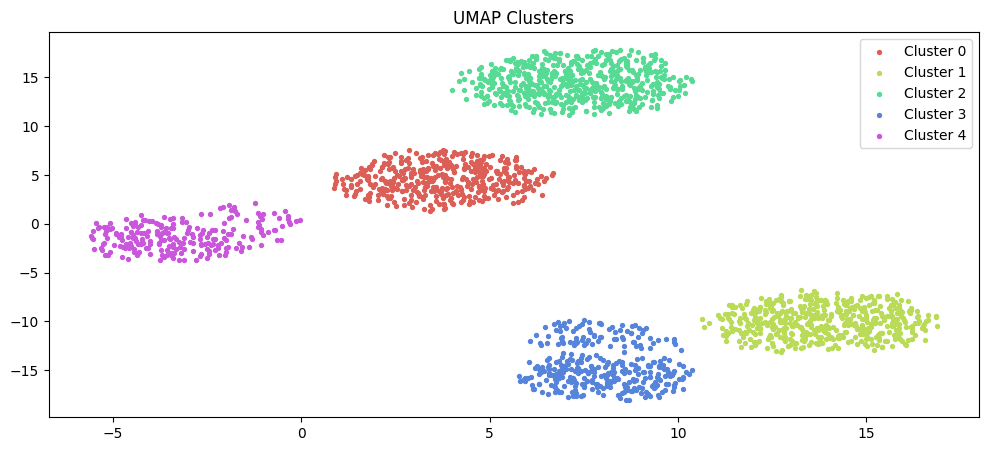

c:\Users\Dodo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


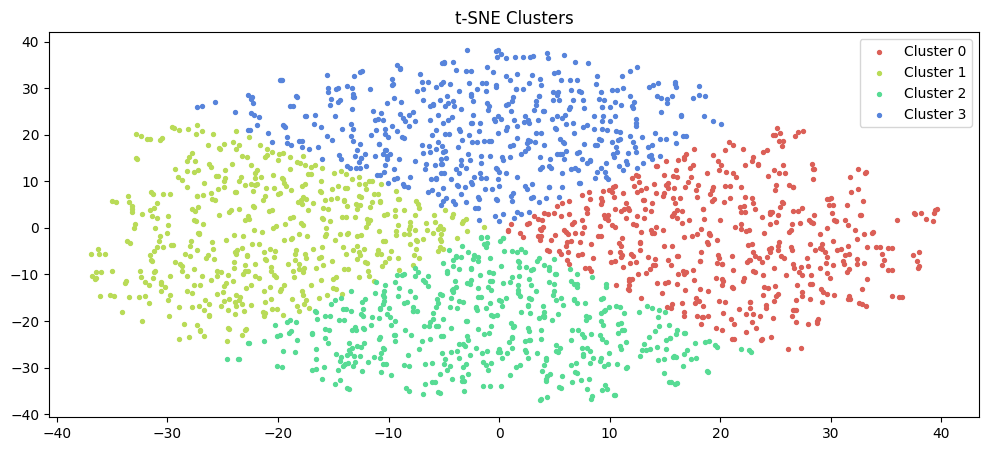

In [582]:
plot_clusters(projection_umap, 5, 'UMAP Clusters')
plot_clusters(projection_tsne, 4, 't-SNE Clusters')


c:\Users\Dodo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


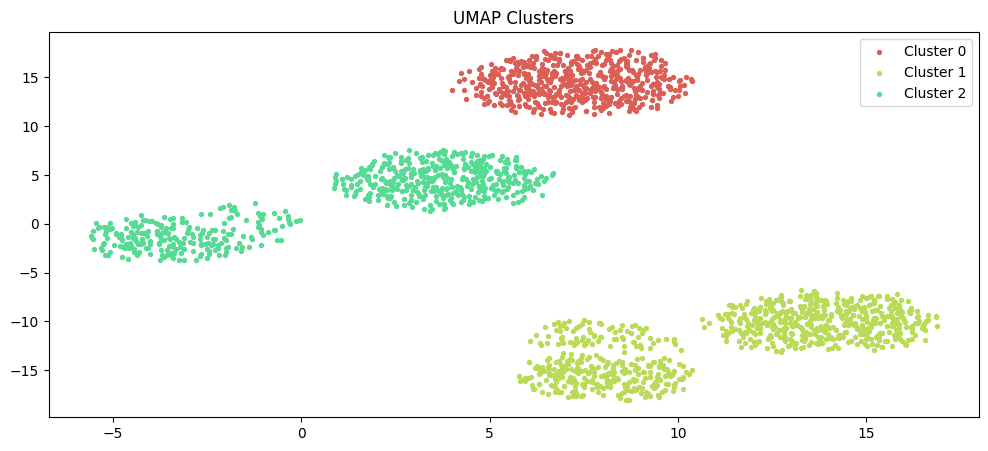

In [583]:
plot_clusters(projection_umap, 3, 'UMAP Clusters')

c:\Users\Dodo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


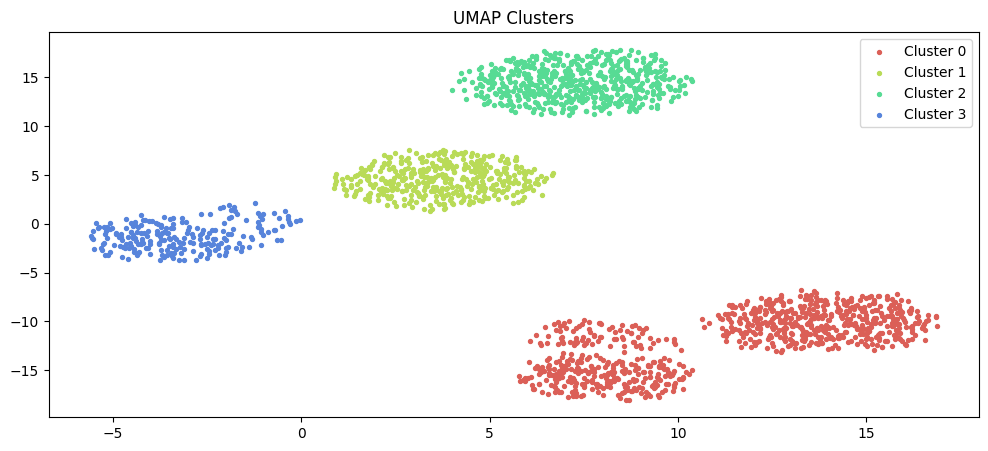

In [584]:
plot_clusters(projection_umap, 4, 'UMAP Clusters')

In [587]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

# Realiza el clustering
kmeans = KMeans(n_clusters=5)
cluster_labels = kmeans.fit_predict(X)

# Itera a través de las características y realiza ANOVA para cada una
for feature_index in range(X.shape[1]):
    feature_to_test = X.iloc[:, feature_index]
    grouped_data = [feature_to_test[cluster_labels == i] for i in range(5)]
    
    # Realiza el ANOVA
    f_statistic, p_value = f_oneway(*grouped_data)
    
    # Imprime los resultados
    print(f"Característica {feature_index + 1}:")
    print(f"ANOVA F-statistic: {f_statistic}")
    print(f"ANOVA p-value: {p_value}")
    print()

Característica 1:
ANOVA F-statistic: 14.161954409997556
ANOVA p-value: 2.1166838673483214e-11

Característica 2:
ANOVA F-statistic: 37.76323756736312
ANOVA p-value: 1.7063207300598448e-30

Característica 3:
ANOVA F-statistic: 504.0508851103351
ANOVA p-value: 9.081340248192911e-301

Característica 4:
ANOVA F-statistic: 15.45081724589617
ANOVA p-value: 1.878803165218272e-12

Característica 5:
ANOVA F-statistic: 26.695128399096145
ANOVA p-value: 1.331492970886596e-21

Característica 6:
ANOVA F-statistic: 380.65559177808865
ANOVA p-value: 6.754785437789646e-244

Característica 7:
ANOVA F-statistic: 43.032990359548144
ANOVA p-value: 1.1192175905237182e-34

Característica 8:
ANOVA F-statistic: 179.62592900778444
ANOVA p-value: 1.35833887195525e-131

Característica 9:
ANOVA F-statistic: 421.06755729024974
ANOVA p-value: 2.3595649143131968e-263



c:\Users\Dodo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [588]:
from sklearn.cluster import KMeans
import numpy as np

# Aplica K-means
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

# Obtiene los centroides de los clusters
centroids = kmeans.cluster_centers_

# Calcula la importancia de las características
feature_importance = np.var(centroids, axis=0)

# Crea un diccionario con las características y sus importancias
feature_importance_dict = {feature: importance for feature, importance in zip(X.columns, feature_importance)}

# Ordena las características por importancia
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Imprime las características más influyentes
for feature, importance in sorted_features:
    print(f'{feature}: {importance}')

Solids: 0.01257596630688754
Turbidity: 0.00981024995105795
Conductivity: 0.009178725751261966
Hardness: 0.004465264817741342
Trihalomethanes: 0.0028534095836949594
Sulfate: 0.001112559811917985
Chloramines: 0.0007714281721158141
ph: 0.0005711261800028296
Organic_carbon: 8.28707409268335e-05


c:\Users\Dodo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
